In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import pickle

In [2]:
df = pd.read_csv("datasets/tsla_data.csv")
df.sort_values(by="date", inplace=True)
df = df[["date","close"]]
df.head()

,date,close
1256,2019-08-19,15.12
1255,2019-08-20,15.06
1254,2019-08-21,14.72
1253,2019-08-22,14.81
1252,2019-08-23,14.09


In [4]:
df.rename(columns={"date":"ds","close":"y"}, inplace=True)

In [5]:
model = Prophet()

model.fit(df)

15:00:16 - cmdstanpy - INFO - Chain [1] start processing
15:00:17 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
future = model.make_future_dataframe(periods=15)

forecast = model.predict(future)

In [11]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-08-19,-12.730962,-43.367618,29.972742,-12.730962,-12.730962,5.095674,5.095674,5.095674,-4.591260,-4.591260,-4.591260,9.686933,9.686933,9.686933,0.0,0.0,0.0,-7.635289
1,2019-08-20,-12.387262,-41.972616,29.050241,-12.387262,-12.387262,4.873127,4.873127,4.873127,-5.336020,-5.336020,-5.336020,10.209147,10.209147,10.209147,0.0,0.0,0.0,-7.514136
2,2019-08-21,-12.043562,-42.337122,32.820970,-12.043562,-12.043562,5.579378,5.579378,5.579378,-5.144547,-5.144547,-5.144547,10.723924,10.723924,10.723924,0.0,0.0,0.0,-6.464184
3,2019-08-22,-11.699862,-39.600673,30.792440,-11.699862,-11.699862,5.018841,5.018841,5.018841,-6.210914,-6.210914,-6.210914,11.229756,11.229756,11.229756,0.0,0.0,0.0,-6.681021
4,2019-08-23,-11.356162,-46.797498,29.362620,-11.356162,-11.356162,5.099642,5.099642,5.099642,-6.626587,-6.626587,-6.626587,11.726229,11.726229,11.726229,0.0,0.0,0.0,-6.256520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,2024-08-26,201.333256,172.310358,246.751361,201.333256,201.333256,8.932142,8.932142,8.932142,-4.591260,-4.591260,-4.591260,13.523401,13.523401,13.523401,0.0,0.0,0.0,210.265398
1268,2024-08-27,201.236784,173.726382,246.318164,201.236784,201.236784,8.659085,8.659085,8.659085,-5.336020,-5.336020,-5.336020,13.995105,13.995105,13.995105,0.0,0.0,0.0,209.895869
1269,2024-08-28,201.140312,174.777739,250.236089,201.140312,201.140312,9.324031,9.324031,9.324031,-5.144547,-5.144547,-5.144547,14.468577,14.468577,14.468577,0.0,0.0,0.0,210.464342
1270,2024-08-29,201.043839,172.141458,245.526038,201.018011,201.043839,8.735306,8.735306,8.735306,-6.210914,-6.210914,-6.210914,14.946221,14.946221,14.946221,0.0,0.0,0.0,209.779145


c:\Users\MEHMET\Desktop\stock_forecast\stenv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\MEHMET\Desktop\stock_forecast\stenv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\MEHMET\Desktop\stock_forecast\stenv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects

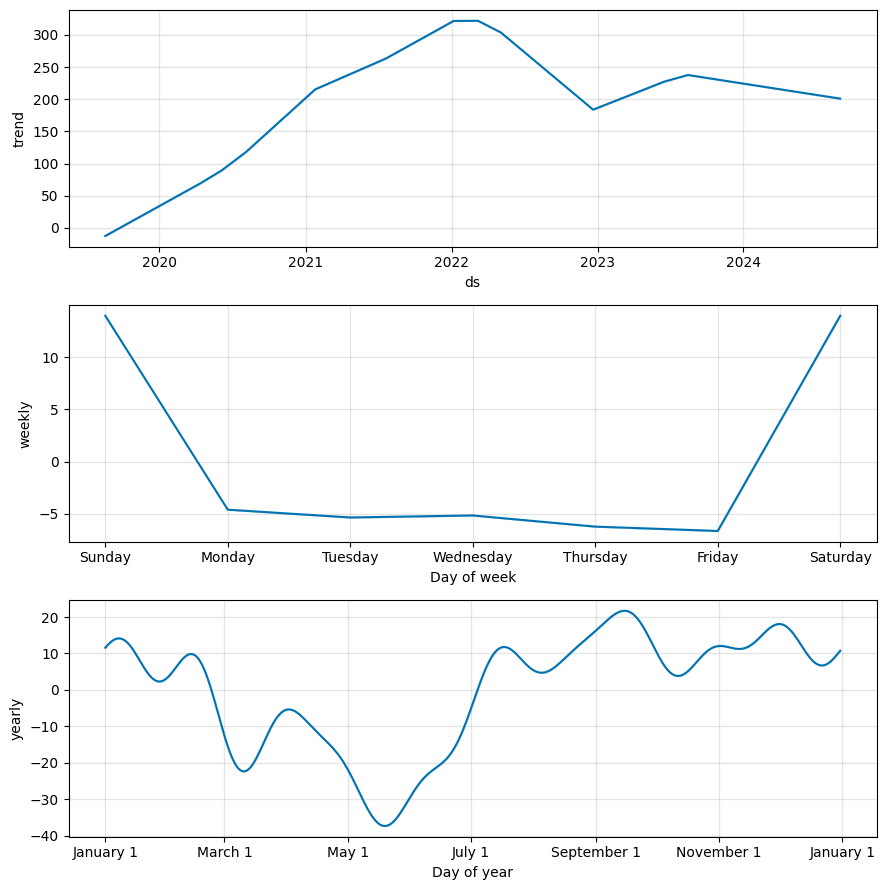

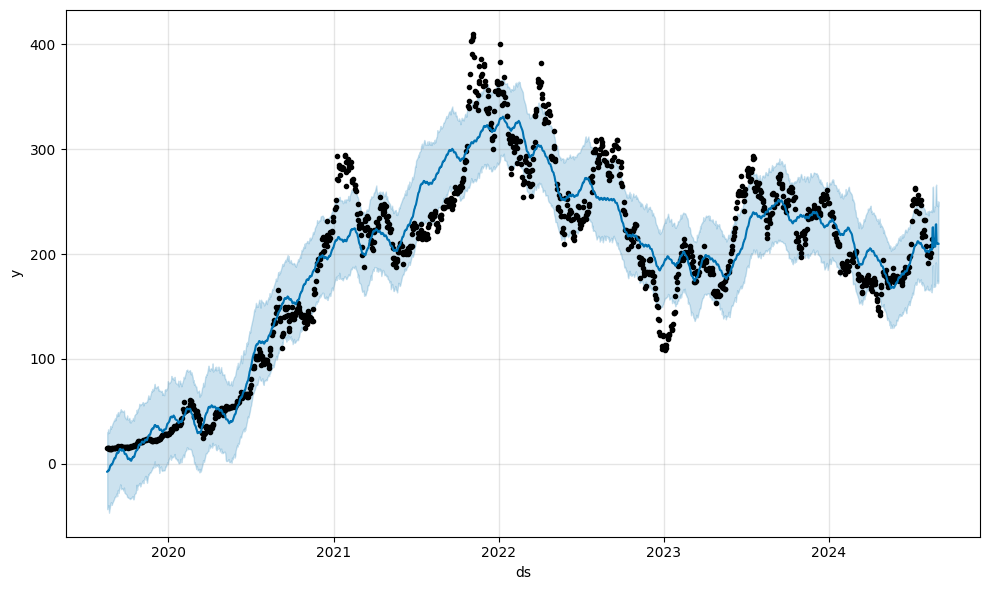

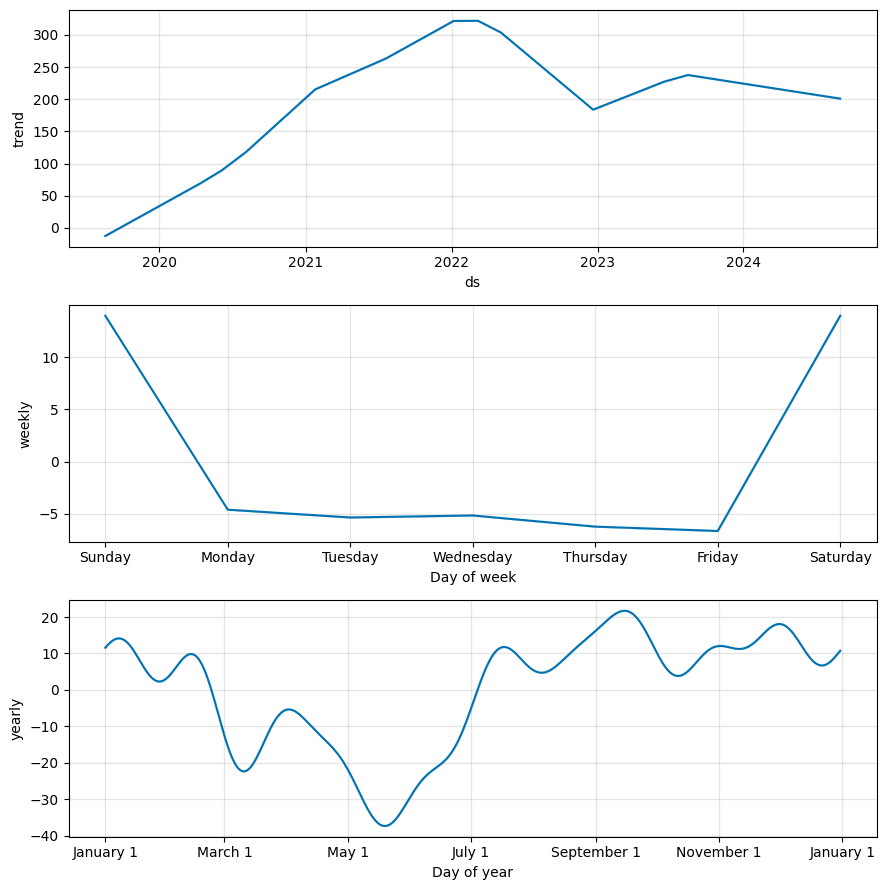

In [7]:
model.plot(forecast)

model.plot_components(forecast)

In [22]:
df['ds'] = pd.to_datetime(df['ds'])
forecast['ds'] = pd.to_datetime(forecast['ds'])
forecast['yhat'] = pd.to_numeric(forecast['yhat'])

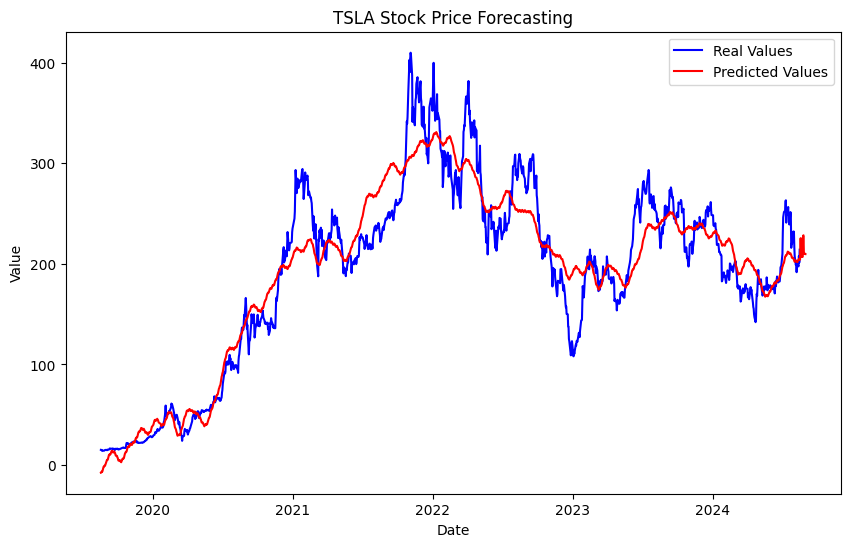

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(df["ds"], df['y'], label='Real Values', color='blue')
plt.plot(forecast["ds"], forecast["yhat"], label='Predicted Values', color='red')
plt.title('TSLA Stock Price Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [26]:
with open('prophet_model.pkl', 'wb') as f:
    pickle.dump(model, f)